In [10]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa

In [2]:
data = tifffile.imread('/nsls2/users/xyang4/ganrec/ganrec/tests/shepp.tiff')

In [33]:
def tomo_radon(rec, ang):
    nang = ang.shape[0]
    img = tf.transpose(rec, [3, 1, 2, 0])
    img = tf.tile(img, [nang, 1, 1, 1])
    img = tfa.image.rotate(img, -ang, interpolation='bilinear')
    sino = tf.reduce_mean(img, 1, name=None)
    sino = tf.image.per_image_standardization(sino)
    sino = tf.transpose(sino, [0, 2, 1])
    sino = tf.reshape(sino, [sino.shape[0], sino.shape[1], sino.shape[2], 1])
    return sino

In [5]:
def angles(nang, ang1=0., ang2=180.):
    return np.linspace(ang1 * np.pi / 180., ang2 * np.pi / 180., nang)

In [6]:
ang = angles(181)

In [8]:
data = np.reshape(data, (128, 128, 128, 1))

In [34]:
prj = tomo_radon(data, ang)

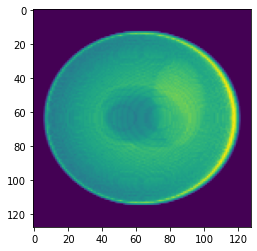

In [35]:
plt.imshow(prj[105])

In [24]:
print(prj.shape)

(181, 128, 128, 1)


In [36]:
tifffile.imwrite('/nsls2/users/xyang4/data/prj_shepp.tiff', prj.numpy())